In [15]:
#-*- encoding: utf-8 -*-

import os
import numpy as np
import imp
import sys

import utils
imp.reload(utils)
from utils.utils import rescale, softmax

import dataset
imp.reload(dataset)
from dataset import MNIST, Feature

import model
imp.reload(model)   # 不这样reload，调试的时候修改引用的py文件是没有作用的
from model import Net_1, Net_2, Optim, AccFunc, CrossEntropyLoss


In [3]:
# network parameters
input_size = 100
layer1_node = 5
layer2_node = 50
output_size = 2

batch_size = 1000
epoch = 1000

individual_num = 20
mu_p = 0.8

In [4]:
############### data pre-processing ###############

train_set = MNIST('mnist', 'train', (10, 10))
test_set = MNIST('mnist', 't10k', (10, 10))

'''10 class
train_feature = Feature(train_set.data, kernel_size=(4,4), stride=(3,3))
train_fv = train_feature._data['images'].reshape(-1, 100)         # 10 class, 100 input
rescale(train_fv, 30, 250, False)
train_label = train_feature._data['labels']
input_train_data = train_feature.cut_into_batch(batch_size=1000, vector=train_fv, labels=train_label)

test_feature = Feature(test_set.data, kernel_size=(4,4), stride=(3,3))
test_fv = test_feature._data['images'].reshape(-1, 100)           # 10 class, 100 input
rescale(test_fv, 30, 250, False)
test_label = test_feature._data['labels']
input_test_data = test_feature.cut_into_batch(batch_size=1000, vector=test_fv, labels=test_label)
'''

train_feature = Feature(train_set.data, kernel_size=(4,4), stride=(3,3))
train_fv, train_label = train_feature.extract_num_class([0, 1])
# print(train_fv.shape)
# print(train_label.shape)
train_fv = train_fv.reshape(-1, 100)
train_fv = rescale(train_fv, 0, 250, False)
input_train_data = train_feature.cut_into_batch(batch_size=1000, vector=train_fv, labels=train_label, num_class=output_size, one_hot=True)

test_feature = Feature(test_set.data, kernel_size=(4,4), stride=(3,3))
test_fv, test_label = test_feature.extract_num_class([0, 1])
test_fv = test_fv.reshape(-1, 100)
test_fv = rescale(test_fv, 30, 250, False)
input_test_data = test_feature.cut_into_batch(batch_size=1000, vector=test_fv, labels=test_label, num_class=output_size, one_hot=True)


In [5]:
############### model define ###############

net = Net_1(input_size, layer1_node, output_size)
# net = Net_2(input_size, layer1_node, layer2_node, output_size)

acc_func = AccFunc()
criterion = CrossEntropyLoss()
optimizer = Optim(net)

In [6]:
############### train ###############

for _ in range(epoch):
    print("Epoch: %d" % _)
    for i, (images, labels) in enumerate(input_train_data):
        outputs = net(images)
        loss = criterion(images, labels)
        

Epoch: 0


KeyError: 0

(array([ 15915.,  62362., 141355., 214909., 174103.,  59058., 172463.,
         87392.,  56528.,  15915.]),
 array([-40. , -30.6, -21.2, -11.8,  -2.4,   7. ,  16.4,  25.8,  35.2,
         44.6,  54. ]),
 <BarContainer object of 10 artists>)

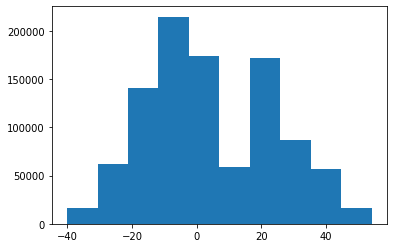

In [22]:
import matplotlib.pyplot as plt
import numpy as np 

net = Net_1(3, 2, 10)
inputs = np.random.randint(5, 21, (100000,3)) * 10
output = net(inputs)

# loss = criterion(output, np.array([[0,0,1]]))
# print(loss)

plt.hist(output.flatten())

In [3]:
import numpy as np

a = np.random.rand(3,4)
b = np.array([1.,2.,3.,4.])
print(a, b)

print(a / b)

[[0.07774371 0.93818279 0.33888064 0.9606487 ]
 [0.64191261 0.68704617 0.48842071 0.41898598]
 [0.39356549 0.10263393 0.25915148 0.41289465]] [1. 2. 3. 4.]
[[0.07774371 0.46909139 0.11296021 0.24016218]
 [0.64191261 0.34352309 0.1628069  0.1047465 ]
 [0.39356549 0.05131696 0.08638383 0.10322366]]
